In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from pathlib import Path  

In [2]:
gene_drug_data_file = path.join('/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/Final Coding/data_matrix.csv') # Data matrix
pathway_drug_data_file = path.join('/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/Final Coding/function_data_matrix.csv') # Data matrix
gene_drug_data = pd.read_csv(gene_drug_data_file,index_col = 0).fillna(0.0)
pathway_drug_data = pd.read_csv(pathway_drug_data_file,index_col = 0).fillna(0.0)

## Unsupervised Learning: UMAP and gene clustering ##

1. some helpful link：https://umap-learn.readthedocs.io/en/latest/basic_usage.html


UMAP with clustering

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
%matplotlib inline


# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [4]:
temp = gene_drug_data[gene_drug_data.columns.tolist()].values
gene_drug_data_scaled = StandardScaler().fit_transform(temp)
kmeans_labels = cluster.KMeans(n_clusters=82).fit_predict(gene_drug_data_scaled)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(gene_drug_data_scaled)

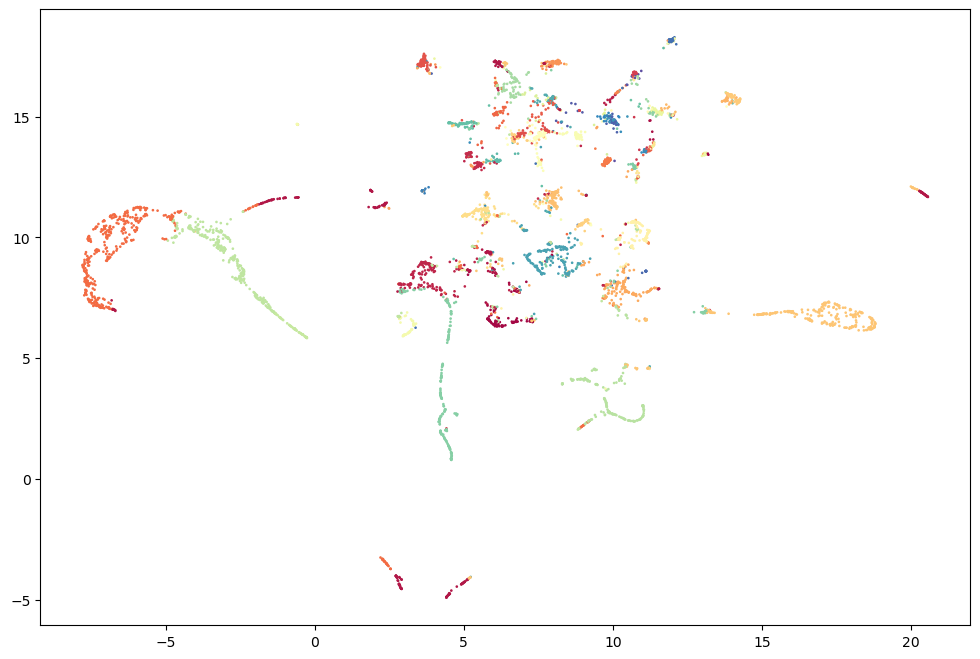

In [6]:
figure(figsize=(12, 8))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.8, cmap='Spectral');

UMAP with hdb scan clustering results:
https://umap-learn.readthedocs.io/en/latest/clustering.html#traditional-clustering
hbdscan: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html#selecting-min-samples

In [7]:
hdbscan_labels = hdbscan.HDBSCAN(min_samples=1, min_cluster_size=50).fit_predict(gene_drug_data_scaled)

Text(0.5, 1.0, 'HDBSCAN Clustering Result on UMAP')

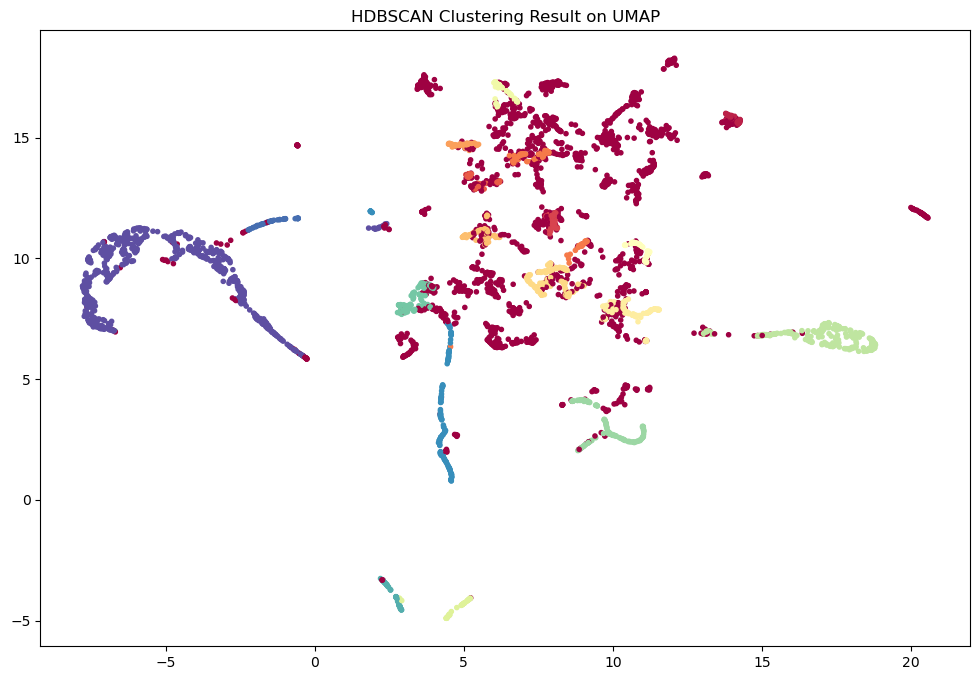

In [33]:
figure(figsize=(12, 8))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=hdbscan_labels, s=9, cmap='Spectral')
plt.title("HDBSCAN Clustering Result on UMAP")

In [25]:
x = []
y = []
labeln = []
for i in range(len(labels)):
    if labels[i] != -1:
        x.append(standard_embedding[i, 0])
        y.append(standard_embedding[i, 1])
        labeln.append(labels[i])
        

Text(0.5, 1.0, 'HDBSCAN Clustering Result on UMAP Excluding Noise')

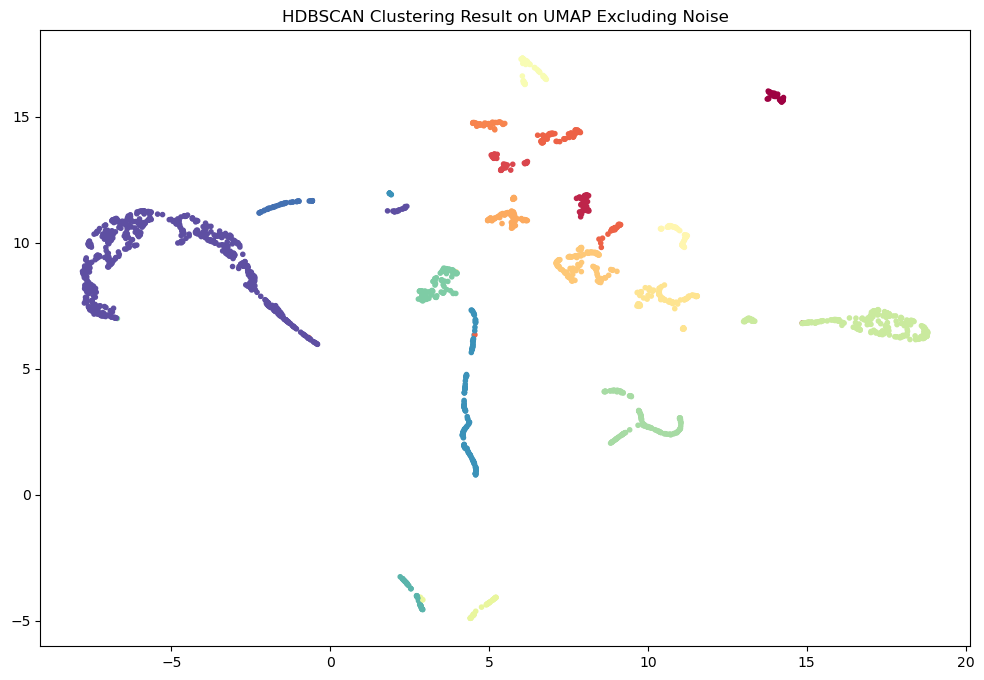

In [32]:
figure(figsize=(12, 8))
plt.scatter(x, y, c=labeln, s=9, cmap='Spectral')
plt.title("HDBSCAN Clustering Result on UMAP Excluding Noise")

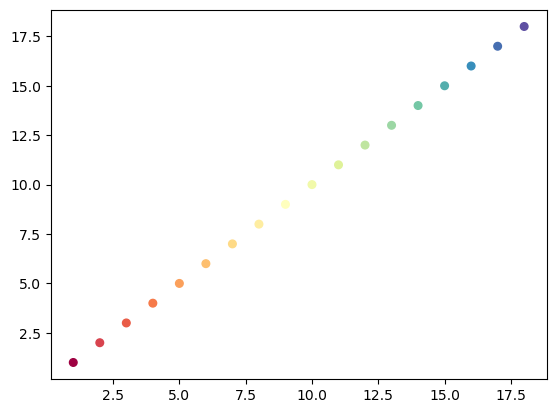

In [9]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
y = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
labels = [-1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
plt.scatter(x,y, c=labels, s=30, cmap='Spectral')

In [10]:
genes = gene_drug_data.index.tolist()
labels = list(hdbscan_labels)

In [11]:
df = pd.DataFrame(labels, index = genes,columns = ['label'])

In [12]:
filepath = Path('/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/gene_label.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  

In [13]:
for i in range(18):
    if i == 0:
        print("-1: " + str(labels.count(-1)))
    else:
        print(str(i) + ": " + str(labels.count(i)))

-1: 2363
1: 64
2: 68
3: 126
4: 56
5: 100
6: 156
7: 127
8: 58
9: 53
10: 55
11: 266
12: 149
13: 102
14: 53
15: 167
16: 52
17: 690


In [14]:
gene_ID_file = path.join('/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/Map Gene to KEGG Pathway/Data_gene_ID_Krishna.csv')
gene_ID = pd.read_csv(gene_ID_file,index_col=0).fillna("0")


In [104]:
genes = df.index.tolist()
target = []
for i in range(len(genes)):
    if labels[i] == 11:
        target.append(genes[i])

In [105]:
labels = hdbscan_labels.tolist()

target, genes in cluster 10

In [106]:
genenames = gene_ID["Gene Name"].tolist()
ID = gene_ID["ID"].tolist()
ID_list = []
for i in target:
    if i in genenames:
        ID_list.append(ID[genenames.index(i)])

In [107]:
len(ID_list)

235

In [108]:
gene_to_pathway_file = path.join('/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/Map Gene to KEGG Pathway/Gene_to_Pathway.csv') # every pathway and the relevant genes
gene_to_pathway = pd.read_csv(gene_to_pathway_file)

In [109]:
gene_to_pathway[gene_to_pathway["Gene"] == 287]

Pathway  Gene
32134  hsa05205   287

In [110]:
pathways = []
for i in ID_list:
    temp = gene_to_pathway[gene_to_pathway["Gene"] == i]['Pathway'].tolist()
    for j in temp:
        pathways.append(j)

In [111]:
spathways = list(set(pathways))

In [112]:
counter = []
for i in spathways:
    counter.append(pathways.count(i))
print(len(spathways))

199


In [113]:
for i in range(len(counter)):
    if counter[i] > 2:
        print("pathway " + spathways[i] + " count "+ str(counter[i]))

pathway hsa04623 count 4
pathway hsa01100 count 9
pathway hsa04110 count 4
pathway hsa04062 count 3
pathway hsa05012 count 3
pathway hsa04927 count 3
pathway hsa04014 count 3
pathway hsa04722 count 3
pathway hsa04612 count 3
pathway hsa05135 count 3
pathway hsa04218 count 4
pathway hsa04912 count 3
pathway hsa04144 count 10
pathway hsa04810 count 4
pathway hsa05168 count 3
pathway hsa04925 count 5
pathway hsa05010 count 4
pathway hsa05014 count 3
pathway hsa04151 count 4
pathway hsa03460 count 4
pathway hsa05169 count 4
pathway hsa04814 count 3
pathway hsa04530 count 7
pathway hsa05200 count 7
pathway hsa04270 count 3
pathway hsa04024 count 5
pathway hsa04714 count 4
pathway hsa04611 count 3
pathway hsa05152 count 3
pathway hsa05016 count 3
pathway hsa04921 count 3
pathway hsa05166 count 7
pathway hsa04015 count 6
pathway hsa04022 count 4
pathway hsa04217 count 6
pathway hsa05203 count 5
pathway hsa05132 count 8
pathway hsa04910 count 3
pathway hsa05163 count 6
pathway hsa04114 count 4

In [114]:
target[0]

'ARHGAP32'

In [115]:
drugc = [0]*23
for i in range(len(target)):
    temp = gene_drug_data.loc[target[i]].tolist()
    for j in range(len(temp)):
        if temp[j] != 0.0:
            drugc[j] += 1
print(drugc)

[3, 0, 0, 0, 0, 0, 0, 34, 0, 0, 0, 0, 0, 0, 0, 266, 266, 0, 0, 0, 0, 0, 0]


In [116]:
gene_drug_data.loc[target[0]]

Lapatinib                 0.199875
Mirdametinib              0.000000
MK-2206                   0.000000
Nintedanib                0.000000
Pertuzumab                0.000000
Pictilisib                0.000000
Refametinib               0.000000
Rituximab                 0.000000
Romidepsin                0.000000
Selumetinib               0.000000
SHP099 dihydrochloride    0.000000
Staurosporine             0.000000
Afatinib                  0.000000
AZD-4547                  0.000000
AZD-8055                  0.000000
Bortezomib               -1.485296
Carfilzomib              -1.345534
CUDC-101                  0.000000
Curcumin                  0.000000
Dactolisib                0.000000
Dasatinib                 0.000000
Gefitinib                 0.000000
Imatinib                  0.000000
Name: ARHGAP32, dtype: float64

## Unsupervised Learning: UMAP and pathway clustering ##

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline


# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

import umap
reducer = umap.UMAP()

In [ ]:
temp = pathway_drug_data[pathway_drug_data.columns.tolist()].values
pathway_drug_data_scaled = StandardScaler().fit_transform(temp)
kmeans_labels = cluster.KMeans(n_clusters=5).fit_predict(pathway_drug_data_scaled)

In [ ]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(pathway_drug_data_scaled)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s = 5)